# Hyperparameters and Model Validation

### **1: Introduction to Hyperparameters**
- **What Are Hyperparameters?**
  - Hyperparameters are parameters that are **set before training** the model.
  - They control the learning process and affect the model’s performance but are not learned from the data.
  - **Reasons for hyperparameters**
    - Sometimes setting is chosen as a hyperparam because it is too difficult to optimize
    - More frequently, the setting is a hyperparam because it is not appropriate to learn that hyperparam on the training set
     - Applies to all hyperparameters for model capacity
       - **If learned on training set, they would always choose maximum model capacity resulting in overfitting**
  - Examples include:
    - Learning rate
    - Number of trees in a random forest
    - Number of layers in a neural network

---

### **2: Types of Parameters in Machine Learning**
- **1. Model Parameters**:
  - Learned during the training process.
  - Examples: weights in a neural network, coefficients in linear regression.
- **2. Hyperparameters**:
  - Set before training the model.
  - Not learned from the data but control how the model is trained.

---

### **3: Common Hyperparameters**
- **Learning Rate**:
  - Controls how much to change the model in response to errors each time the model weights are updated.
- **Number of Epochs**:
  - The number of times the learning algorithm will work through the entire training dataset.
- **Batch Size**:
  - The number of training examples used to estimate the error gradient in each step.
- **Number of Neurons** (for neural networks):
  - Controls the complexity of the model.
- **Regularization Parameter**:
  - Prevents overfitting by adding a penalty for larger weights.

---

### **4: Tuning Hyperparameters**
- **Why Tuning is Important**:
  - Hyperparameters significantly affect model performance.
  - Proper tuning can lead to a model that generalizes well to new, unseen data.
- **Methods to Tune Hyperparameters**:
  - **Grid Search**: Tries all possible combinations of hyperparameters.
  - **Random Search**: Samples random combinations of hyperparameters.
  - **Bayesian Optimization**: Uses probability models to find the best combination.

---

### **5: Introduction to Model Validation**
- **What is Model Validation?**
  - Model validation is the process of evaluating a model’s performance on a **separate dataset** that is not used for training.
  - Helps ensure the model generalizes well to unseen data.
  - Test examples should not be used to make choices about the model hyperparameters
  - **Training data is split into two disjoint parts**
    - First to learn the parameters
    - Other is the validation set to estimate generalization error during or after training
      - allowing for the hyperparameters to be updated
    - **Typically 80% of training data for training and 20% for validation**
  - **Test sets also need to change**
    - Over many years, the same test set used 
repeatedly to evaluate performance of different 
algorithms
    - With repeated attempts to beat state-of-the-art performance, we have optimistic evaluations with the test set as well
    - Community tends to move to new, usually more 
ambitious and larger benchmark data sets

---

### **6: Why Do We Need Model Validation?**
- **Avoid Overfitting**:
  - Overfitting happens when the model performs well on the training data but poorly on unseen data.
  - Validation helps prevent overfitting by testing the model on a separate validation set.
- **Estimate Model Performance**:
  - Helps assess the true performance of the model on new data.

---

### **7: Types of Validation Methods**
- **1. Hold-Out Validation**:
  - Split the dataset into **training** and **validation** sets.
  - Train the model on the training set and evaluate it on the validation set.
  - One disadvantage of using a holdout set for model validation is that we have **lost a portion** of our data to the model training
- **2. K-Fold Cross-Validation**:
  - The data is divided into **k** subsets.
  - The model is trained on **k-1** subsets and validated on the remaining subset. This process is repeated **k** times.
- **3. Leave-One-Out Cross-Validation (LOOCV)**:
  - Similar to k-fold, but each subset has only one data point. It is repeated for every data point in the dataset.
- **4. Stratified Cross-Validation**:
  - Ensures that each fold has a balanced representation of classes, which is useful for imbalanced datasets.

---

### **8: Steps of Model Validation Process**
1. **Step 1: Split Data**:
   - Separate your dataset into **training** and **validation** sets (or use cross-validation).
2. **Step 2: Train the Model**:
   - Train the model on the training set using predefined hyperparameters.
3. **Step 3: Validate the Model**:
   - Test the model on the validation set to check performance (e.g., accuracy, precision, recall).
4. **Step 4: Tune Hyperparameters**:
   - If necessary, adjust hyperparameters based on validation results.
5. **Step 5: Re-validate**:
   - After tuning, validate the model again to ensure improved performance.

---

### **9: Model Validation Metrics**
- **1. Accuracy**:
  - Percentage of correctly predicted instances.
- **2. Precision**:
  - The ratio of true positive predictions to all positive predictions.
- **3. Recall**:
  - The ratio of true positive predictions to all actual positives.
- **4. F1 Score**:
  - The harmonic mean of precision and recall.
- **5. AUC-ROC**:
  - Area under the ROC curve, measuring the model’s ability to distinguish between classes.

---

### **10: Final Model Testing**
- **After Validation:**
  - Once a model is tuned using hyperparameter optimization and validated, it is trained on the **entire training dataset**.
  - It is then tested on a **completely unseen test dataset** to evaluate final performance.

---

### **11: Conclusion**
- **Summary**:
  - Hyperparameters control the learning process and need careful tuning.
  - Model validation ensures that the model generalizes well to unseen data and avoids overfitting.
  - Proper validation and hyperparameter tuning are essential to building reliable machine learning models.

---

In the previous chapter, we saw the basic recipe for applying a supervised machine learning model:

1. Choose a class of model.
2. Choose model hyperparameters.
3. Fit the model to the training data.
4. Use the model to predict labels for new data.

The first two pieces of this—the choice of model and choice of hyperparameters—are perhaps the most important part of using these tools and techniques effectively.
In order to make informed choices, we need a way to *validate* that our model and our hyperparameters are a good fit to the data.
While this may sound simple, there are some pitfalls that you must avoid to do this effectively.

In [1]:
# Model validation - all code using KNN example

import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()

# X = pd.DataFrame(iris.data, columns=iris.feature_names)
# y = pd.Series(iris.target)
# print(X.head(), '\n', y.head())

X = iris.data
y = iris.target
print(X[:5], y[:5])

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

# train = test set
y_model = model.predict(X)
print(y_model, X.shape, y.shape)

from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_model)) # will be 1.0

# SPLIT
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
# can be used to test using 0.8 which is 80% and 20%
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

# fit the model on one set of data
# evaluate the model on the second set of data
# 2-fold
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
print(accuracy_score(y1, y1_model), accuracy_score(y2, y2_model))

# k-fold
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X, y, cv=5))

#leaveOneOut
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
print(scores.mean())

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] [0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] (150, 4) (150,)
1.0
0.96 0.9066666666666666
[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
0.96


Predicted class for the new sample: setosa


/var/folders/gr/sskfghgd49d7z1z8k_stnwfm0000gn/T/ipykernel_49837/33993316.py:20: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[y_pred == idx, 0], X_test[y_pred == idx, 1],


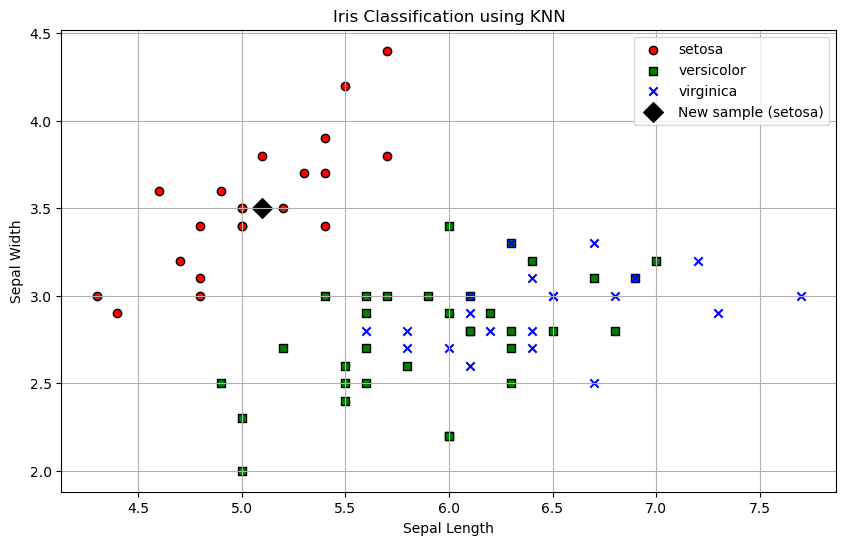

In [2]:
# Example: Predict class for a new sample (sepal length, sepal width, petal length, petal width)
new_sample = [[5.1, 3.5, 1.4, 0.2]]  # Replace with your input
predicted_class = model.predict(new_sample)
print(f"Predicted class for the new sample: {iris.target_names[predicted_class][0]}")

X_test = X2
y_test = y2
y_pred = y2_model
# Plot the data
def plot_iris(X, y, new_sample=None, new_sample_class=None):
    plt.figure(figsize=(10, 6))
    
    # Define markers and colors for each class
    markers = ['o', 's', 'x']
    colors = ['red', 'green', 'blue']
    labels = iris.target_names

    # Plot the test data with predictions
    for idx, (marker, color) in enumerate(zip(markers, colors)):
        plt.scatter(X_test[y_pred == idx, 0], X_test[y_pred == idx, 1], 
                    marker=marker, color=color, label=labels[idx], edgecolor='k')

    # If there's a new sample, plot it
    if new_sample is not None:
        plt.scatter(new_sample[0][0], new_sample[0][1], 
                    color='black', label=f"New sample ({iris.target_names[new_sample_class][0]})", 
                    s=100, marker='D', edgecolor='k')

    plt.title('Iris Classification using KNN')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Extract the first two features (sepal length and sepal width) for plotting
X_test_2D = X_test[:, :2]  # Only take the first two features

# Call the plotting function and include the new sample
plot_iris(X_test_2D, y_test, new_sample=new_sample, new_sample_class=predicted_class)

## Thinking About Model Validation

In principle, model validation is very simple: after choosing a model and its hyperparameters, we can estimate how effective it is by applying it to some of the training data and comparing the predictions to the known values.

This section will first show a naive approach to model validation and why it
fails, before exploring the use of holdout sets and cross-validation for more robust
model evaluation.

### Model Validation the Wrong Way

Let's start with the naive approach to validation using the Iris dataset, which we saw in the previous chapter.
We will start by loading the data:

In [56]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)
print(X.head(), '\n', y.head())

X = iris.data
y = iris.target
print(X[:5], y[:5])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2 
 0    0
1    0
2    0
3    0
4    0
dtype: int64
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] [0 0 0 0 0]


### **What is the Iris Dataset?**

1. **Dataset Origin**:
   - The Iris dataset was introduced by **Ronald A. Fisher** in 1936.
   - It contains **150 samples** of **iris flowers** from three different species: *Iris setosa*, *Iris versicolor*, and *Iris virginica*.

2. **Features (X)**:
   - The dataset has four features (attributes), all numeric:
     1. **Sepal length** (in cm)
     2. **Sepal width** (in cm)
     3. **Petal length** (in cm)
     4. **Petal width** (in cm)

3. **Target (y)**:
   - The **target (y)** is the species of the iris flower. 
   - It is represented as an **integer**, where:
     - 0 = *Iris setosa*
     - 1 = *Iris versicolor*
     - 2 = *Iris virginica*

---

### **Iris Dataset Structure**

| Sepal Length (cm) | Sepal Width (cm) | Petal Length (cm) | Petal Width (cm) | Species(y)     |
|-------------------|------------------|-------------------|------------------|----------------|
| 5.1               | 3.5              | 1.4               | 0.2              | Iris setosa     |
| 7.0               | 3.2              | 4.7               | 1.4              | Iris versicolor |
| 6.3               | 3.3              | 6.0               | 2.5              | Iris virginica  |

- The features are measurements of the flowers, and the species is the target (y).

---

Next, we choose a model and hyperparameters. Here we'll use a *k*-nearest neighbors classifier with `n_neighbors=1`.
This is a very simple and intuitive model that says "the label of an unknown point is the same as the label of its closest training point".

The **Euclidean distance formula** is used in the **k-nearest neighbors (KNN)** algorithm to measure how close a new data point is to the points in the existing dataset. In the context of the **Iris dataset**, where each data point represents a flower with four features (sepal length, sepal width, petal length, petal width), the Euclidean distance helps KNN find the most similar (or "closest") flower from the training data to classify the new flower.


#### **Euclidean Distance Formula**:
The Euclidean distance between two points in a multi-dimensional space is the straight-line distance between them. For the Iris dataset, each flower is represented as a point in **4-dimensional space** because there are four features.
For two points \(p\) and \(q\), where:
- \(p = (p_1, p_2, p_3, p_4)\) (the four features of one flower: sepal length, sepal width, petal length, petal width)
- \(q = (q_1, q_2, q_3, q_4)\) (the four features of another flower)

The Euclidean distance \(d(p, q)\) between these two points is:
$d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + (p_3 - q_3)^2 + (p_4 - q_4)^2}$.

This formula calculates the distance between two points in a four-dimensional space.

### **Example:**

#### **Step 1: Feature Vector for a New Data Point**
Let’s say we have a new flower with the following features (new data point):
- Sepal length: 5.0 cm
- Sepal width: 3.5 cm
- Petal length: 1.6 cm
- Petal width: 0.3 cm

So, the feature vector for this flower is:
\[ p = (5.0, 3.5, 1.6, 0.3) \]

#### **Step 2: Comparing with a Flower in the Dataset**
Now, let's compare this new flower with one of the flowers in the Iris dataset. Suppose we choose the first flower in the dataset, which has the following features:
- Sepal length: 5.1 cm
- Sepal width: 3.5 cm
- Petal length: 1.4 cm
- Petal width: 0.2 cm

The feature vector for this flower is:
\[ q = (5.1, 3.5, 1.4, 0.2) \]

#### **Step 3: Calculate Euclidean Distance**
To find how similar the new flower is to this flower from the dataset, we use the Euclidean distance formula.

The Euclidean distance calculation can be shown as follows:

$d(p, q) = \sqrt{(5.0 - 5.1)^2 + (3.5 - 3.5)^2 + (1.6 - 1.4)^2 + (0.3 - 0.2)^2}$
$= \sqrt{(-0.1)^2 + (0)^2 + (0.2)^2 + (0.1)^2}$
$= \sqrt{0.01 + 0 + 0.04 + 0.01}$
$= \sqrt{0.06}$
$\approx 0.245$

So, the Euclidean distance between the new flower and this flower from the dataset is approximately **0.245**.

#### **Step 4: Repeat for Other Data Points**
You would repeat this process to calculate the Euclidean distance between the new flower and **every other flower** in the dataset.

#### **Step 5: Find the Nearest Neighbor(s)**
- After calculating the distances, the KNN algorithm finds the **nearest neighbors** by choosing the points with the smallest distances.
- For **k = 1** (i.e., `n_neighbors=1`), it selects the flower with the **smallest Euclidean distance** as the "nearest neighbor."
- The label (species) of that nearest neighbor is then assigned to the new flower.

#### **Step 6: Predict the Species**
- If the nearest flower belongs to the species *Iris setosa*, the new flower is predicted to also belong to *Iris setosa*.
- If **k > 1** (for example, k = 3), the algorithm would find the 3 nearest neighbors and assign the species based on a **majority vote**.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

Then we train the model, and use it to predict labels for data whose labels we already know:

In [46]:
model.fit(X, y)
y_model = model.predict(X)
print(y_model, X.shape, y.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] (150, 4) (150,)


Finally, we compute the fraction of correctly labeled points:

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

We see an accuracy score of 1.0, which indicates that 100% of points were correctly labeled by our model!
But is this truly measuring the expected accuracy? Have we really come upon a model that we expect to be correct 100% of the time?

As you may have gathered, the answer is no.
In fact, this approach contains a fundamental flaw: *it trains and evaluates the model on the same data*.
Furthermore, this nearest neighbor model is an *instance-based* estimator that simply stores the training data, and predicts labels by comparing new data to these stored points: except in contrived cases, it will get 100% accuracy every time!

### Model Validation the Right Way: Holdout Sets

So what can be done?
A better sense of a model's performance can be found by using what's known as a *holdout set*: that is, we hold back some subset of the data from the training of the model, and then use this holdout set to check the model's performance.
This splitting can be done using the `train_test_split` utility in Scikit-Learn:

In [48]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
# can be used to test using 0.8 which is 80% and 20%
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
print(accuracy_score(y2, y2_model))
print(X1.shape, X2.shape, y1.shape, y2.shape)

0.9066666666666666
(75, 4) (75, 4) (75,) (75,)


We see here a more reasonable result: the one-nearest-neighbor classifier is about 90% accurate on this holdout set.
The holdout set is similar to unknown data, because the model has not "seen" it before.

### Model Validation via Cross-Validation

One disadvantage of using a holdout set for model validation is that we have **lost a portion** of our data to the model training.
In the preceding case, half the dataset does not contribute to the training of the model!
This is not optimal, especially if the initial set of training data is small.

One way to address this is to use *cross-validation*; that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set.
Visually, it might look something like the following figure:

![](figures/05.03-2-fold-CV.png)

Here we do two validation trials, alternately using each half of the data as a holdout set.
Using the split data from earlier, we could implement it like this:

In [49]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

What comes out are two accuracy scores, which we could combine (by, say, taking the mean) to get a better measure of the global model performance.
This particular form of cross-validation is a *two-fold cross-validation*—that is, one in which we have split the data into two sets and used each in turn as a validation set.

We could expand on this idea to use even more trials, and more folds in the data—for example, the following figure shows a visual depiction of five-fold cross-validation.

![](figures/05.03-5-fold-CV.png)

Here we split the data into five groups, and use each of them in turn to evaluate the model fit on the other four-fifths of the data.
This would be rather tedious to do by hand, but we can use Scikit-Learn's `cross_val_score` convenience routine to do it succinctly:

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

Repeating the validation across different subsets of the data gives us an even better idea of the performance of the algorithm.

Scikit-Learn implements a number of cross-validation schemes that are useful in particular situations; these are implemented via iterators in the `model_selection` module.
For example, we might wish to go to the extreme case in which our number of **folds is equal to the number of data points**: that is, we train on all points but one in each trial.
This type of cross-validation is known as *leave-one-out* cross validation, and can be used as follows:

In [51]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Because we have 150 samples, the leave-one-out cross-validation yields scores for 150 trials, and each score indicates either a successful (1.0) or an unsuccessful (0.0) prediction.
Taking the mean of these gives an estimate of the error rate:

In [52]:
scores.mean()

0.96

Other cross-validation schemes can be used similarly.
For a description of what is available in Scikit-Learn, use IPython to explore the ``sklearn.model_selection`` submodule, or take a look at Scikit-Learn's [cross-validation documentation](http://scikit-learn.org/stable/modules/cross_validation.html).

## Selecting the Best Model

Now that we've explored the basics of validation and cross-validation, we will go into a little more depth regarding model selection and selection of hyperparameters.
These issues are some of the most important aspects of the practice of machine learning, but I find that this information is often glossed over in introductory machine learning tutorials.

Of core importance is the following question: *if our estimator is underperforming, how should we move forward?*
There are several possible answers:

- Use a more complicated/more flexible model.
- Use a less complicated/less flexible model.
- Gather more training samples.
- Gather more data to add features to each sample.

The answer to this question is often counterintuitive.
In particular, sometimes using a more complicated model will give worse results, and adding more training samples may not improve your results!
The ability to determine what steps will improve your model is what separates the successful machine learning practitioners from the unsuccessful.

#### **Bias:** 
Bias refers to the error introduced by approximating a real-world problem, which may be extremely complex, by a simplified model. A high-bias model makes strong assumptions about the data, which can lead to systematic errors. 
 <br/> **Example**: A linear regression model trying to predict a nonlinear relationship would have high bias because it's too simplistic for the data.   <br/>
( high-bias = Imagine you have a dataset that represents the relationship between temperature and ice cream sales, which follows a nonlinear pattern (e.g., sales increase sharply at certain temperatures).)  <br/>
(simple =  Suppose you want to predict house prices based solely on the average price in a neighborhood without considering any other features (like size or number of rooms).)


#### **Variance:**
Variance refers to how much the model's predictions change when trained on different subsets of the data. A high-variance model is very sensitive to fluctuations in the training data and may fit even random noise. <br/> **Example**: A decision tree with no depth limit might perfectly fit the training data (including noise), leading to high variance.

---

#### **Why Does High Bias Create Underfitting?**

- **High-bias models** make overly simplistic assumptions about the data, which results in them missing important patterns or relationships.
- **Underfitting** occurs when the model cannot capture the complexity of the data, leading to poor performance on both training and test data.
  
**Why High Bias Happens**:
- Using a model that is too simple for the problem (e.g., linear regression on nonlinear data).
- The model is constrained or regularized too much (e.g., very high regularization terms in ridge regression).

---

#### **Why Does High Variance Create Overfitting?**

- **High-variance models** are too flexible and try to learn not just the patterns in the data but also the noise, leading to overfitting.
- **Overfitting** happens when the model performs well on the training data but poorly on unseen data because it has learned the details and noise specific to the training set.
  
**Why High Variance Happens**:
- The model is too complex for the amount of training data (e.g., using a very deep decision tree or a high-degree polynomial).
- The model is very sensitive to small changes in the data, often due to insufficient regularization or a lack of constraints on model complexity.

---

### **The Bias-Variance Tradeoff:**
- **Bias**: Measures how far off the predictions are from the true values on average (systematic error).
- **Variance**: Measures how much the predictions for a given point vary between different training sets (sensitivity to the data).
- **Low Bias, High Variance**: The model fits the training data very well (low error) but generalizes poorly to new data (high error on test data).
- **High Bias, Low Variance**: The model performs poorly on both training and test data because it is too simplistic to capture the underlying structure of the data.
- The goal is to find a balance between bias and variance, so the model performs well on both training and unseen data. This is known as the **bias-variance tradeoff**.


Fundamentally, finding "the best model" is about finding a sweet spot in the trade-off between *bias* and *variance*.
Consider the following figure, which presents two regression fits to the same dataset.

![](figures/05.03-bias-variance.png)

It is clear that neither of these models is a particularly good fit to the data, but they fail in different ways.

The model on the left attempts to find a straight-line fit through the data.
Because in this case a straight line cannot accurately split the data, the straight-line model will never be able to describe this dataset well.
Such a model is said to *underfit* the data: that is, it does not have enough flexibility to suitably account for all the features in the data. Another way of saying this is that the model has high bias.

The model on the right attempts to fit a high-order polynomial through the data.
Here the model fit has enough flexibility to nearly perfectly account for the fine features in the data, but even though it very accurately describes the training data, its precise form seems to be more reflective of the particular noise properties of the data than of the intrinsic properties of whatever process generated that data.
Such a model is said to *overfit* the data: that is, it has so much flexibility that the model ends up accounting for random errors as well as the underlying data distribution. Another way of saying this is that the model has high variance.

To look at this in another light, consider what happens if we use these two models to predict the *y*-values for some new data.
In the plots in the following figure, the red/lighter points indicate data that is omitted from the training set.

![](figures/05.03-bias-variance-2.png)

The score here is the $R^2$ score, or [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), which measures how well a model performs relative to a simple mean of the target values. $R^2=1$ indicates a perfect match, $R^2=0$ indicates the model does no better than simply taking the mean of the data, and negative values mean even worse models.
From the scores associated with these two models, we can make an observation that holds more generally:

- For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
- For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

If we imagine that we have some ability to tune the model complexity, we would expect the training score and validation score to behave as illustrated in the following figure:

![](figures/05.03-validation-curve.png)

The diagram shown here is often called a *validation curve*, and we see the following features:

- The training score is everywhere higher than the validation score. This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.
- For very low model complexity (a high-bias model), the training data is underfit, which means that the model is a poor predictor both for the training data and for any previously unseen data.
- For very high model complexity (a high-variance model), the training data is overfit, which means that the model predicts the training data very well, but fails for any previously unseen data.
- For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.

The means of tuning the model complexity varies from model to model; when we discuss individual models in depth in later chapters, we will see how each model allows for such tuning.

### Validation Curves in Scikit-Learn

Let's look at an example of using cross-validation to compute the validation curve for a class of models.
Here we will use a *polynomial regression* model: this is a generalized linear model in which the degree of the polynomial is a tunable parameter.
For example, a degree-1 polynomial fits a straight line to the data; for model parameters $a$ and $b$:

$$
y = ax + b
$$

A degree-3 polynomial fits a cubic curve to the data; for model parameters $a, b, c, d$:

$$
y = ax^3 + bx^2 + cx + d
$$

We can generalize this to any number of polynomial features.
In Scikit-Learn, we can implement this with a linear regression classifier combined with the polynomial preprocessor.
We will use a *pipeline* to string these operations together (we will discuss polynomial features and pipelines more fully in [Feature Engineering](05.04-Feature-Engineering.ipynb)):

## START CHOSE THE RIGHT MODEL_FULL CODE (using Polynomial Regression)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

/var/folders/gr/sskfghgd49d7z1z8k_stnwfm0000gn/T/ipykernel_78197/3518078781.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Model slope:     2.027208810360696
Model intercept: -4.9985770855532055


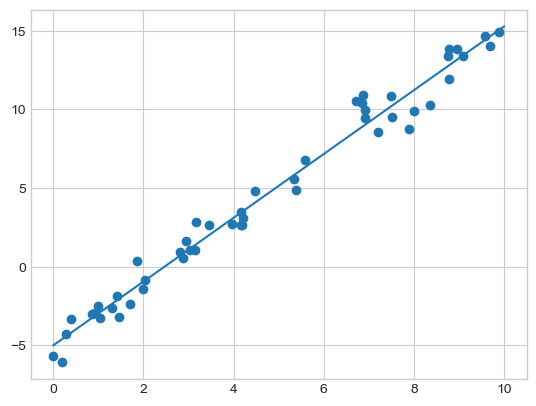

In [17]:
# Simple Linear Reg | Ploynomial Linear Reg | Bias, Variance | Choosing the right model

rng = np.random.RandomState(1) # seed 42 0r 1 or anything
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50) # 2x+(-5+random)

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

def SimpleLRUsingScikit(x,y):
    model.fit(x[:, np.newaxis], y)
    
    print("Model slope:    ", model.coef_[0])
    print("Model intercept:", model.intercept_)

    xfit = np.linspace(0, 10, 1000)
    # xfit = np.linspace(-1, 11)
    yfit = model.predict(xfit[:, np.newaxis])

    plt.scatter(x, y)
    plt.plot(xfit, yfit);
    
SimpleLRUsingScikit(x,y);

0.5000000000000121
[ 1.5 -2.   1. ]


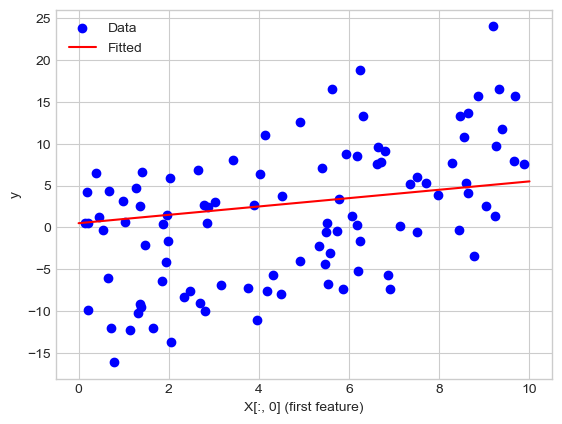

In [18]:
# for multiple values of x
# 𝑦=𝑎0+𝑎1𝑥1+𝑎2𝑥2
def MultipleXValuesLR():
    rng = np.random.RandomState(1)
    X = 10 * rng.rand(100, 3)
    y = 0.5 + np.dot(X, [1.5, -2., 1.])
    # Here the  𝑦 data is constructed from a linear combination of three random  𝑥 values, and the linear regression recovers the coefficients used to construct the data.

    model.fit(X, y)
    print(model.intercept_)
    print(model.coef_)
    
    # Predict values based on the model (for the first feature)
    xfit = np.linspace(0, 10, 1000)
    Xfit = np.column_stack([xfit, xfit, xfit]) # 3 features
    yfit = model.predict(Xfit)

    # Plot the original data (first feature vs. target)
    plt.scatter(X[:, 0], y, label="Data", color="blue")
    
    # Plot the predicted line
    plt.plot(xfit, yfit, label="Fitted", color="red")
    plt.xlabel("X[:, 0] (first feature)")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    

MultipleXValuesLR()

[[ 2.  4.  8.]
 [ 3.  9. 27.]
 [ 4. 16. 64.]]
Original X:
 [[1.73907352e-01]
 [5.18867376e-01]
 [1.30815988e-08]
 [9.14049845e-02]
 [2.15372915e-02]]
Polynomial features X:
 [[1.73907352e-01 3.02437672e-02 5.25961348e-03]
 [5.18867376e-01 2.69223354e-01 1.39691215e-01]
 [1.30815988e-08 1.71128228e-16 2.23863083e-24]
 [9.14049845e-02 8.35487119e-03 7.63676871e-04]
 [2.15372915e-02 4.63854925e-04 9.99017872e-06]]


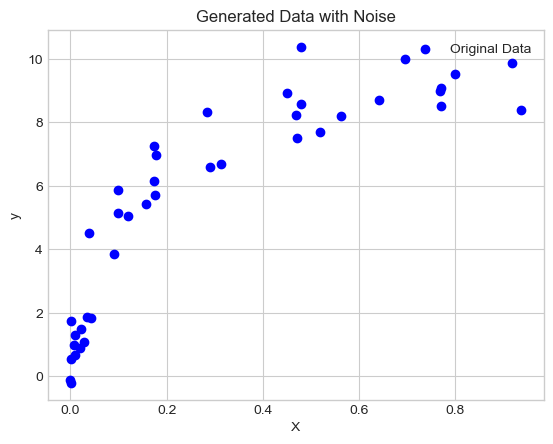

In [30]:
# 𝑦=𝑎0+𝑎1𝑥+𝑎2𝑥2+𝑎3𝑥3
# [[1,x,x^2,x^3]]
# [[1,2,4,8],[1,3,9,27]] dot [a0/a1/a2/a3] (1X4)
# fn(x) = x^n

from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
print(poly.fit_transform(x[:, None]))

def make_data(N):
    # randomly sample the data
    rng = np.random.RandomState(1)
    X = rng.rand(N, 1) ** 2 # ** 2 doesn't matter
    # y = 10 - (1/(x.ravel()+0.1)) + error
    y = (10 - 1. / (X.ravel() + 0.1)) + rng.randn(N) # x.ravel() flattens 2D to 1D add some errors
    return X, y

X, y = make_data(40)
X_poly = poly.fit_transform(X)

print("Original X:\n", X[:5])
print("Polynomial features X:\n", X_poly[:5])

# Visualize the relationship
plt.scatter(X, y, color='blue', label='Original Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data with Noise')
plt.legend()
plt.show()

[[-0.1       ]
 [-0.09759519]
 [-0.09519038]
 [-0.09278557]
 [-0.09038076]]


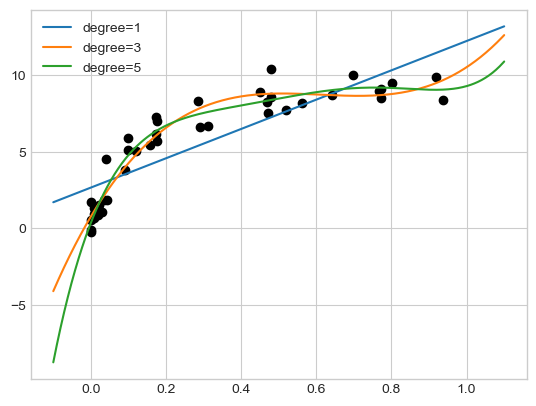

In [47]:
# nth-degree polynomial model with LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

X, y = make_data(40)
plt.scatter(X.ravel(), y, color='black')

X_test = np.linspace(-0.1, 1.1, 500)[:, np.newaxis] # None
print(X_test[:5])

# axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree='+str(degree))
# plt.xlim(-0.1, 1.0)
# plt.ylim(-2, 12)
plt.legend(loc='best');

[[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.72060505 0.73235327 0.71615237 0.75517775 0.6979951  0.74351307
  0.71104367]
 [0.8966661  0.89427274 0.88460403 0.90482859 0.87685741 0.90106431
  0.90420325]] [[-0.60246643 -0.00204615 -0.00514137 -0.08448036 -0.04342093 -0.21918928
  -0.09456538]
 [ 0.5924168   0.52955915  0.78017784  0.49009912  0.76508479  0.52353779
   0.79740092]
 [ 0.82135627  0.89189957  0.96373583  0.81295458  0.93423775  0.8077944
   0.80337792]]


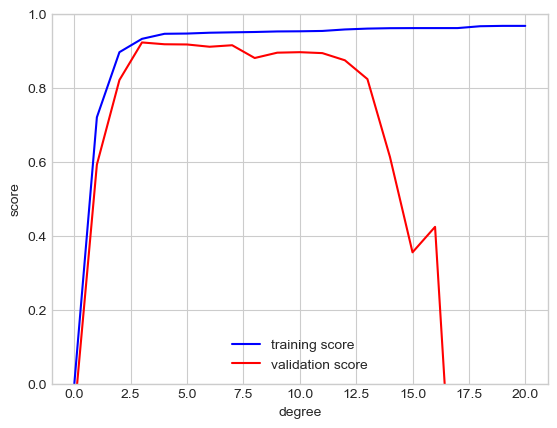

In [50]:
# with polynomial degree gives the best shot
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)

train_score, val_score = validation_curve(PolynomialRegression(), X, y,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7)
# cv=7 means The cv=7 parameter means 7-fold cross-validation. This divides the data into 7 subsets or "folds".
# For each fold, the model is trained on 6 subsets and validated on the remaining 1 subset. This process is repeated 7 times, using each subset as a validation set exactly once.
print(train_score[:3], val_score[:3])

# axis=1 means calculate the median along each row (horizontally).
# axis=0 would mean calculate the median along each column (vertically).
# median is n/2th value. for instance: 4th value out of 7-valued array is the median.
plt.plot(degree, np.median(train_score, 1),
         color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1),
         color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

(-0.1, 1.0)

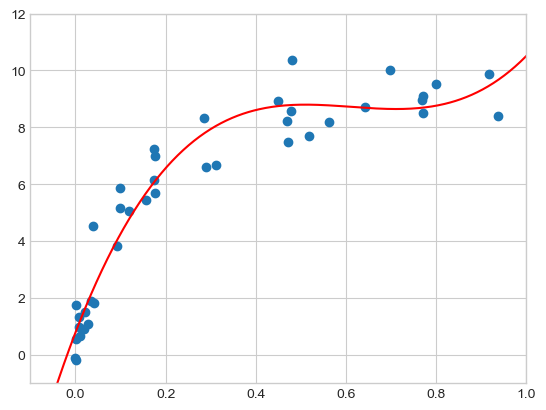

In [65]:
# 3rd order considered the best
plt.scatter(X.ravel(), y)
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, 'red');
plt.ylim(-1,12)
plt.xlim(-0.1, 1)

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}


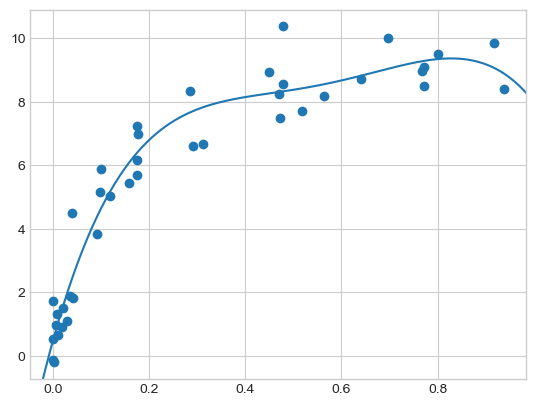

In [67]:
# which is the best
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y);
print(grid.best_params_)

model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

## FINISH CHOSE THE RIGHT MODEL

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

Now let's create some data to which we will fit our model:

In [25]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

We can now visualize our data, along with polynomial fits of several degrees (see the following figure):

/var/folders/gr/sskfghgd49d7z1z8k_stnwfm0000gn/T/ipykernel_8961/2034904486.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


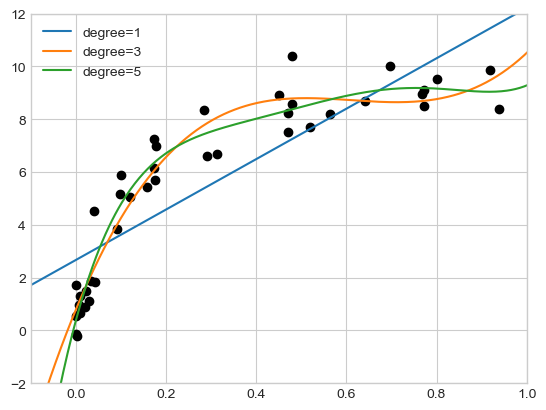

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

The knob controlling model complexity in this case is the degree of the polynomial, which can be any nonnegative integer.
A useful question to answer is this: what degree of polynomial provides a suitable trade-off between bias (underfitting) and variance (overfitting)?

We can make progress in this by visualizing the validation curve for this particular data and model; this can be done straightforwardly using the ``validation_curve`` convenience routine provided by Scikit-Learn.
Given a model, data, parameter name, and a range to explore, this function will automatically compute both the training score and the validation score across the range (see the following figure):

In [3]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(
    PolynomialRegression(), X, y,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1),
         color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1),
         color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

NameError: name 'np' is not defined

This shows precisely the qualitative behavior we expect: the training score is everywhere higher than the validation score, the training score is monotonically improving with increased model complexity, and the validation score reaches a maximum before dropping off as the model becomes overfit.

From the validation curve, we can determine that the optimal trade-off between bias and variance is found for a third-order polynomial. We can compute and display this fit over the original data as follows (see the following figure):

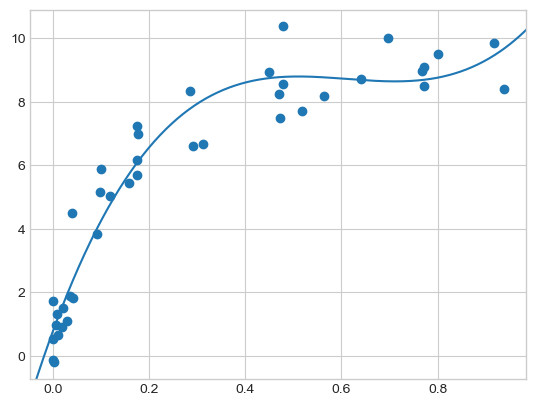

In [28]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

Notice that finding this optimal model did not actually require us to compute the training score, but examining the relationship between the training score and validation score can give us useful insight into the performance of the model.

## Learning Curves

One important aspect of model complexity is that the optimal model will generally depend on the size of your training data.
For example, let's generate a new dataset with five times as many points (see the following figure):

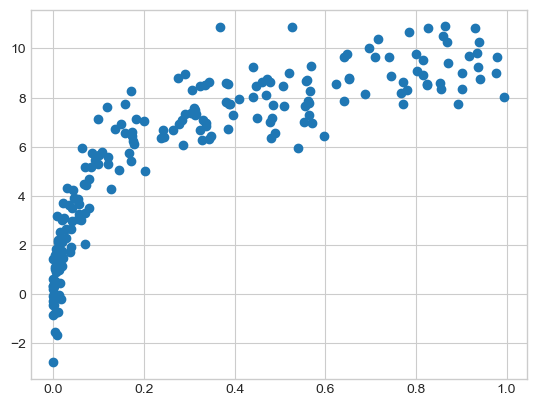

In [29]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

Now let's duplicate the preceding code to plot the validation curve for this larger dataset; for reference, we'll overplot the previous results as well (see the following figure):

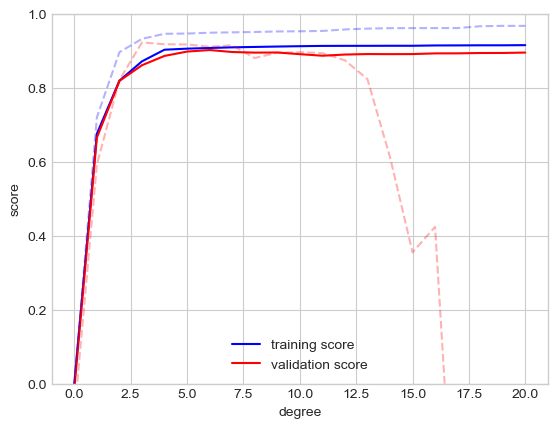

In [30]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(
    PolynomialRegression(), X2, y2,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7)

plt.plot(degree, np.median(train_score2, 1),
         color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1),
         color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1),
         color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1),
         color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

The solid lines show the new results, while the fainter dashed lines show the results on the previous smaller dataset.
It is clear from the validation curve that the larger dataset can support a much more complicated model: the peak here is probably around a degree of 6, but even a degree-20 model is not seriously overfitting the data—the validation and training scores remain very close.

So, the behavior of the validation curve has not one but two important inputs: the model complexity and the number of training points.
We can gain further insight by exploring the behavior of the model as a function of the number of training points, which we can do by using increasingly larger subsets of the data to fit our model.
A plot of the training/validation score with respect to the size of the training set is sometimes known as a *learning curve.*

The general behavior we would expect from a learning curve is this:

- A model of a given complexity will *overfit* a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
- A model of a given complexity will *underfit* a large dataset: this means that the training score will decrease, but the validation score will increase.
- A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.

With these features in mind, we would expect a learning curve to look qualitatively like that shown in the following figure:

![](figures/05.03-learning-curve.png)

The notable feature of the learning curve is the convergence to a particular score as the number of training samples grows.
In particular, once you have enough points that a particular model has converged, *adding more training data will not help you!*
The only way to increase model performance in this case is to use another (often more complex) model.

### Learning Curves in Scikit-Learn

Scikit-Learn offers a convenient utility for computing such learning curves from your models; here we will compute a learning curve for our original dataset with a second-order polynomial model and a ninth-order polynomial (see the following figure):

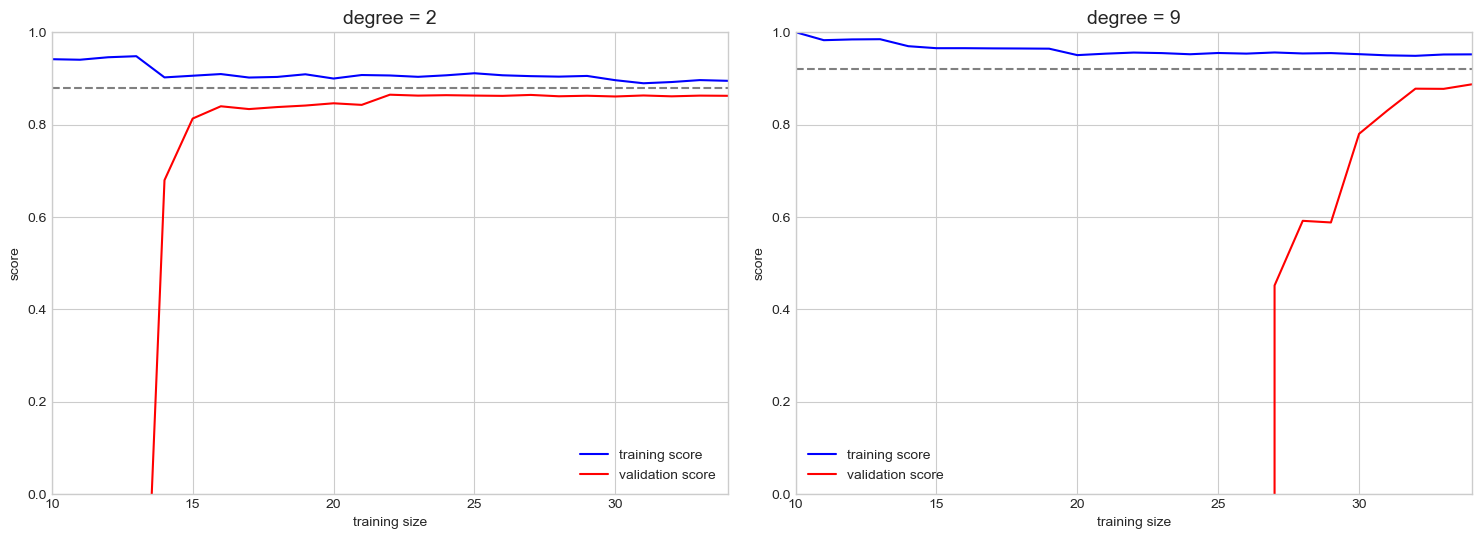

In [31]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(
        PolynomialRegression(degree), X, y, cv=7,
        train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1),
               color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1),
               color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0],
                 N[-1], color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

This is a valuable diagnostic, because it gives us a visual depiction of how our model responds to increasing amounts of training data.
In particular, when the learning curve has already converged (i.e., when the training and validation curves are already close to each other) *adding more training data will not significantly improve the fit!*
This situation is seen in the left panel, with the learning curve for the degree-2 model.

The only way to increase the converged score is to use a different (usually more complicated) model.
We see this in the right panel: by moving to a much more complicated model, we increase the score of convergence (indicated by the dashed line), but at the expense of higher model variance (indicated by the difference between the training and validation scores).
If we were to add even more data points, the learning curve for the more complicated model would eventually converge.

Plotting a learning curve for your particular choice of model and dataset can help you to make this type of decision about how to move forward in improving your analysis.

## Validation in Practice: Grid Search

The preceding discussion is meant to give you some intuition into the trade-off between bias and variance, and its dependence on model complexity and training set size.
In practice, models generally have more than one knob to turn, meaning plots of validation and learning curves change from lines to multidimensional surfaces.
In these cases, such visualizations are difficult, and we would rather simply find the particular model that maximizes the validation score.

Scikit-Learn provides some tools to make this kind of search more convenient: here we'll consider the use of grid search to find the optimal polynomial model.
We will explore a two-dimensional grid of model features, namely the polynomial degree and the flag telling us whether to fit the intercept.
This can be set up using Scikit-Learn's `GridSearchCV` meta-estimator:

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

Notice that like a normal estimator, this has not yet been applied to any data.
Calling the ``fit`` method will fit the model at each grid point, keeping track of the scores along the way:

In [33]:
grid.fit(X, y);

Now that the model is fit, we can ask for the best parameters as follows:

In [34]:
grid.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}

Finally, if we wish, we can use the best model and show the fit to our data using code from before (see the following figure):

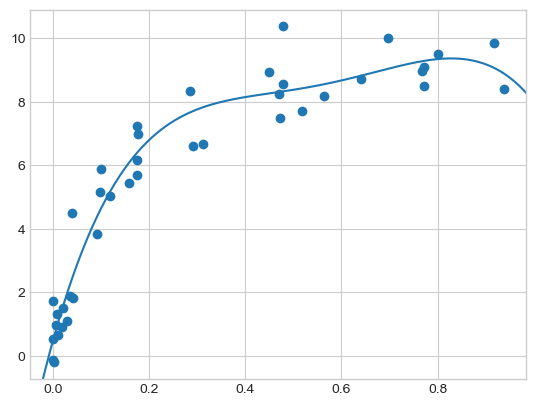

In [35]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

Other options in `GridSearchCV` include the ability to specify a custom scoring function, to parallelize the computations, to do randomized searches, and more.
For more information, see the examples in [In-Depth: Kernel Density Estimation](05.13-Kernel-Density-Estimation.ipynb) and [Feature Engineering: Working with Images](05.14-Image-Features.ipynb), or refer to Scikit-Learn's [grid search documentation](http://Scikit-Learn.org/stable/modules/grid_search.html).

## Summary

In this chapter we began to explore the concept of model validation and hyperparameter optimization, focusing on intuitive aspects of the bias–variance trade-off and how it comes into play when fitting models to data.
In particular, we found that the use of a validation set or cross-validation approach is vital when tuning parameters in order to avoid overfitting for more complex/flexible models.

In later chapters, we will discuss the details of particularly useful models, what tuning is available for these models, and how these free parameters affect model complexity.
Keep the lessons of this chapter in mind as you read on and learn about these machine learning approaches!